In [1]:
import os
import torch
import numpy as np
import torch.nn as nn
from nn_modules import Encoder,Decoder
from torch.utils.data import DataLoader, TensorDataset
from matplotlib import image
import matplotlib.pyplot as plt

In [2]:
name = 'AutoEncoder_06_10_6'
depths=[3, 3, 3, 9, 3, 3, 3]
dims=[3, 6, 12, 24, 48,96,192]
dConv_kernel_size=7

##AUTOENCODER DEFINITION
class AutoEncoder(nn.Module):
    def __init__(self,depths,dims, dConv_kernel_size=7):
        super().__init__()
        self.encoder = Encoder(depths=depths,dims = dims, dConv_kernel_size = dConv_kernel_size)
        self.decoder = Decoder(depths=depths,dims = dims, dConv_kernel_size = dConv_kernel_size)

    def forward(self,x):
        encoding = self.encoder(x)
        decoding = self.decoder(encoding)
        return(decoding)


In [1]:
imgs = []
for filename in os.listdir('./AE_Testing'):
    array = image.imread(f'./AE_Testing/{filename}')
    array = np.moveaxis(array,-1,0)
    
    array = np.divide(array, 255,dtype='float32')
    imgs.append(array)
imgs = torch.tensor(imgs)

NameError: name 'os' is not defined

In [ ]:
model = AutoEncoder(depths,dims,dConv_kernel_size)
ckpt = r'C:\Users\Admin\Documents\studentassistent-privé\Jair\CORE\models\AutoEncoder_10_10\26ckpt.pt'
model.load_state_dict(torch.load(ckpt))

<All keys matched successfully>

In [ ]:
n = np.random.randint(0,len(imgs))
result = model(imgs[n:n+2])

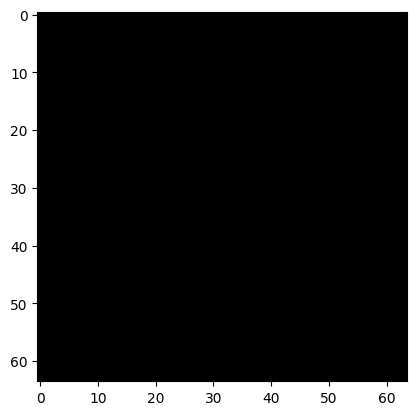

In [ ]:
sample = np.swapaxes(imgs[n],0,-1)
plt.imshow(sample)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


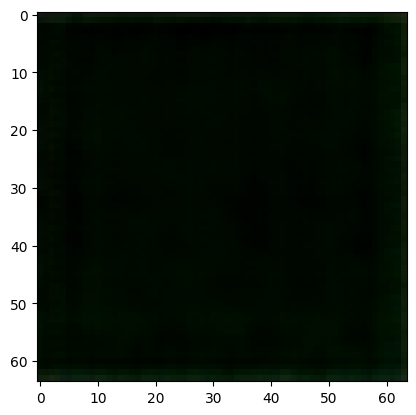

In [ ]:
img = np.swapaxes(result[0].detach().numpy(),0,-1)
plt.imshow(img)